This script takes two inputs: a folder containing the images that passed the QC process, and a image metadata pickle file. This script does a simple eda of the metadata and explores any interesting findings. 

In [20]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


In [2]:
## USER INPUT ##

# the path to the where the images are 
folder_path = "/Users/brianmiller/Desktop/trading_card_data/verified_data/data_for_model_3/"

# load the metadata
metadata = pd.read_pickle('/Users/brianmiller/Desktop/trading_card_data/verified_data/metadata_3k_subset.pickle')


In [3]:
## SUBSET METADATA TO JUST IMAGES OF INTEREST ##

# get all of the files in the 
files_in_folder_fullname = os.listdir(folder_path)

# remove the '_cropped' suffix that was added to the files, this is so we can find a match in the metadata file
files_in_folder = [file.split("_cropped")[0] + ".jpg" for file in files_in_folder_fullname]

# do the subsetting
metadata_subset = metadata[metadata['image_name_file'].isin(files_in_folder)].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10698 entries, 3 to 3000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10698 non-null  int64  
 1   grade            10698 non-null  object 
 2   image_name       10698 non-null  object 
 3   price            10388 non-null  object 
 4   desc             10698 non-null  object 
 5   source           10698 non-null  object 
 6   grade_num        10698 non-null  int64  
 7   price_num        10388 non-null  float64
 8   year             10660 non-null  float64
 9   image_name_file  10698 non-null  object 
 10  source_clean     10698 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.9+ KB
None


In [6]:
##  GET SIZE METADATA ABOUT THE IMAGES  ##

# Define empty lists for the dimensions and resolution
widths = []
heights = []

# Loop through the filenames in the dataframe
for filename in metadata_subset['image_name_file']:
    
    # Open the image using Pillow
    image = Image.open(folder_path + filename.split(".jpg")[0] + "_cropped.jpg")
    
    # Get the dimensions and resolution
    width, height = image.size
    
    # Add the values to the lists
    widths.append(width)
    heights.append(height)
    
    # Close the image file
    image.close()

# Add the lists to the dataframe as new columns
metadata_subset['width'] = widths
metadata_subset['height'] = heights

print(metadata_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10698 entries, 3 to 3000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10698 non-null  int64  
 1   grade            10698 non-null  object 
 2   image_name       10698 non-null  object 
 3   price            10388 non-null  object 
 4   desc             10698 non-null  object 
 5   source           10698 non-null  object 
 6   grade_num        10698 non-null  int64  
 7   price_num        10388 non-null  float64
 8   year             10660 non-null  float64
 9   image_name_file  10698 non-null  object 
 10  source_clean     10698 non-null  object 
 11  width            10698 non-null  int64  
 12  height           10698 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.1+ MB
None


In [11]:
metadata_subset.head()

,id,grade,image_name,price,desc,source,grade_num,price_num,year,image_name_file,source_clean,width,height
3,3,Grade: PSA 1 (MK),/Users/brianmiller/Desktop/collection_files/images_psa1/card3_PSA1.jpg,Buy: $86.50,1967 Topps Venezuelan - [Base] #169 - Bobby Doerr [PSA 1 PR (MK)],Check Out My Collectibles,1,86.50,1967.0,card3_PSA1.jpg,Check Out My Collectibles,400,547
6,6,Grade: PSA 1 (MC),/Users/brianmiller/Desktop/collection_files/images_psa1/card6_PSA1.jpg,Buy: $210.00,1952 Topps Andy Pafko PSA 1 PR (mc) *CARD #1 * Red Back Brooklyn Dodgers Vintage,eBay (the-lacollection),1,210.00,1952.0,card6_PSA1.jpg,eBay,400,471
8,8,Grade: PSA 1,/Users/brianmiller/Desktop/collection_files/images_psa1/card8_PSA1.jpg,"Buy: $40,000.00",1936 World Wide Gum V355 #51 Joe DiMaggio PSA 1 RC Rookie Yankees (6127),eBay (www.707sportscards.com),1,40000.00,1936.0,card8_PSA1.jpg,eBay,400,536
15,15,Grade: PSA 1,/Users/brianmiller/Desktop/collection_files/images_psa1/card15_PSA1.jpg,Buy: $119.96,1963 Fleer #56 Roberto Clemente PSA 1 Graded Baseball Card Pittsburgh Pirates,eBay (konksplatt),1,119.96,1963.0,card15_PSA1.jpg,eBay,400,578
20,20,Grade: PSA 1,/Users/brianmiller/Desktop/collection_files/images_psa1/card20_PSA1.jpg,Buy: $59.99,1966 Topps Willie Mays Giants #1 PSA 1,eBay (john082501),1,59.99,1966.0,card20_PSA1.jpg,eBay,400,506


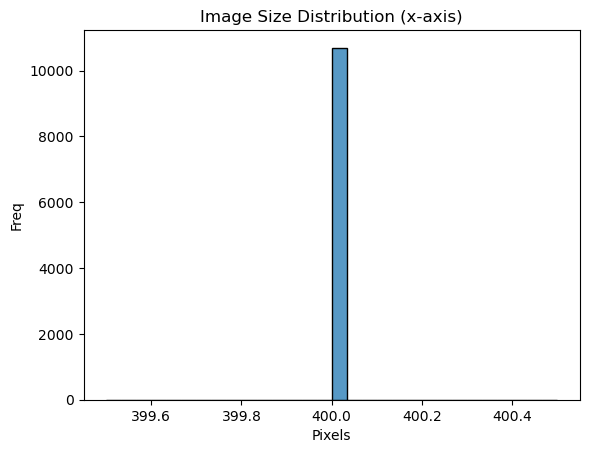

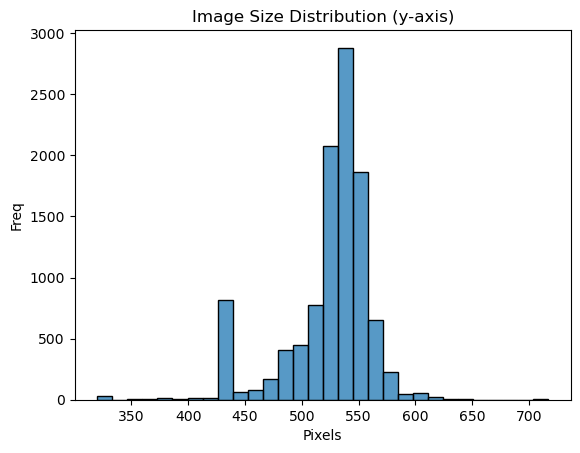

In [59]:
## IMAGE DIMENSIONS DISTRIBUTIONS
sns.histplot(metadata_subset['width'], kde=False, bins=30)
plt.title('Image Size Distribution (x-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

sns.histplot(metadata_subset['height'], kde=False, bins=30)
plt.title('Image Size Distribution (y-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

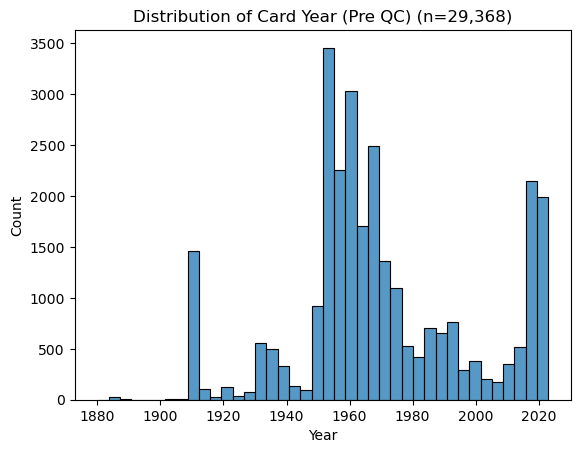

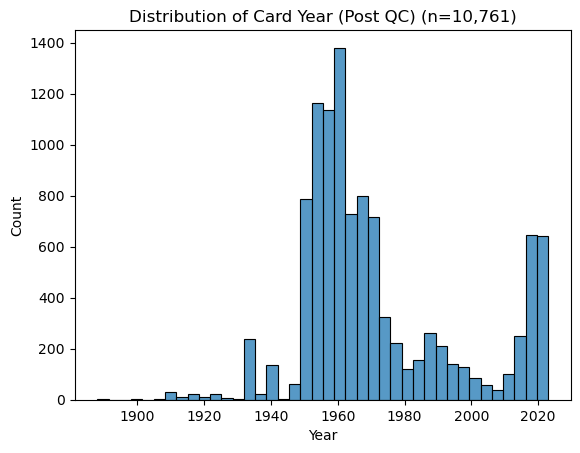

In [69]:
sns.histplot(metadata['year'], kde=False, bins=40)
plt.title('Distribution of Card Year (Pre QC) (n=29,368)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

sns.histplot(metadata_subset['year'], kde=False, bins=40)
plt.title('Distribution of Card Year (Post QC) (n=10,761)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

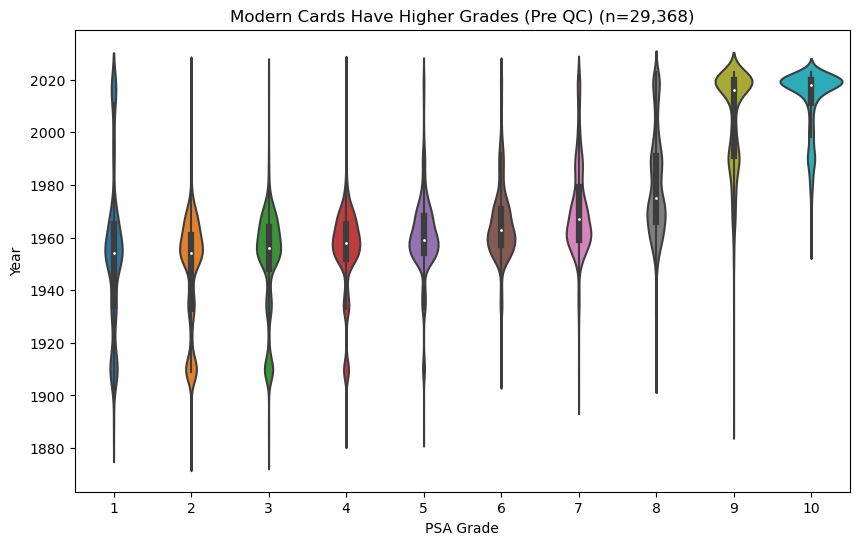

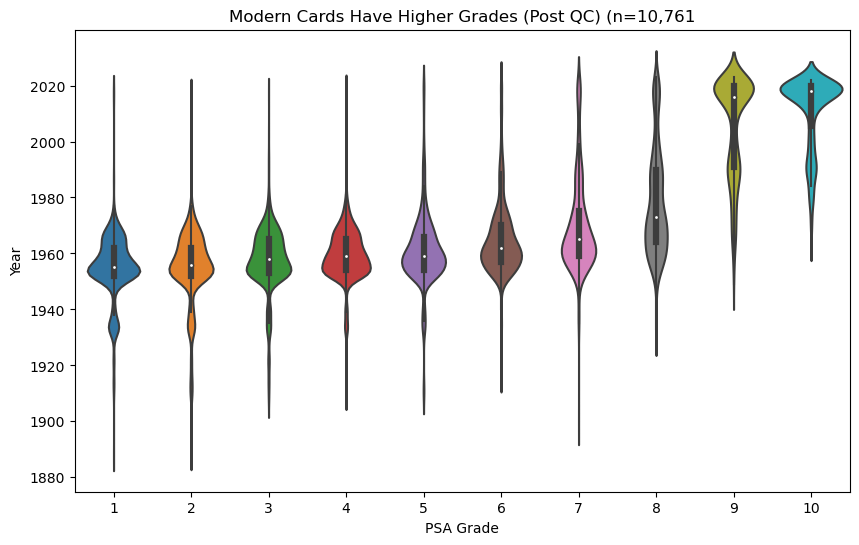

In [72]:
# Plot
plt.figure(figsize=(10,6))
sns.violinplot(x='grade_num', y='year', data=metadata)
plt.title('Modern Cards Have Higher Grades (Pre QC) (n=29,368)')
plt.xlabel('PSA Grade')
plt.ylabel('Year')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='grade_num', y='year', data=metadata_subset)
plt.title('Modern Cards Have Higher Grades (Post QC) (n=10,761')
plt.xlabel('PSA Grade')
plt.ylabel('Year')
plt.show()


/var/folders/8c/kzx234q16zdf6dwkcnk692x80000gn/T/ipykernel_13504/4117556169.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  source_counts = source_counts[top_4_sources].append(pd.Series([source_counts[top_4_sources[4:]].sum()], index=['others']))


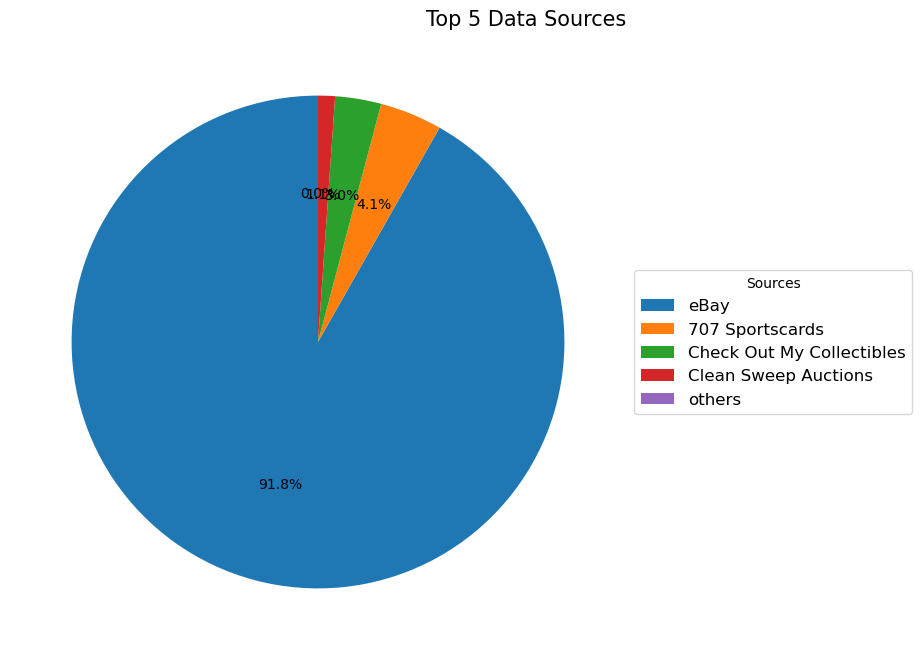

In [15]:
# Compute the top 5 most frequent unique values and group the rest as 'others'
source_counts = metadata_subset['source_clean'].value_counts()
top_4_sources = source_counts.index[:4]
source_counts = source_counts[top_4_sources].append(pd.Series([source_counts[top_4_sources[4:]].sum()], index=['others']))

# Create the pie chart with the modified value counts and a legend
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(source_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(source_counts.index, title='Sources', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Set the title and adjust the font size
plt.title('Top 5 Data Sources', fontsize=15, loc='right')
plt.show()


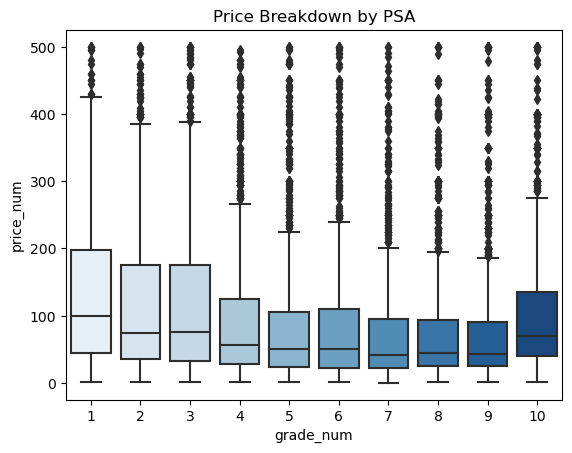

In [58]:
sns.boxplot(x='grade_num', y='price_num', data= metadata_subset[metadata_subset['price_num'] < 500], palette='Blues')
plt.title('Price Breakdown by Grade ', fontsize=12, loc='center')
plt.show()

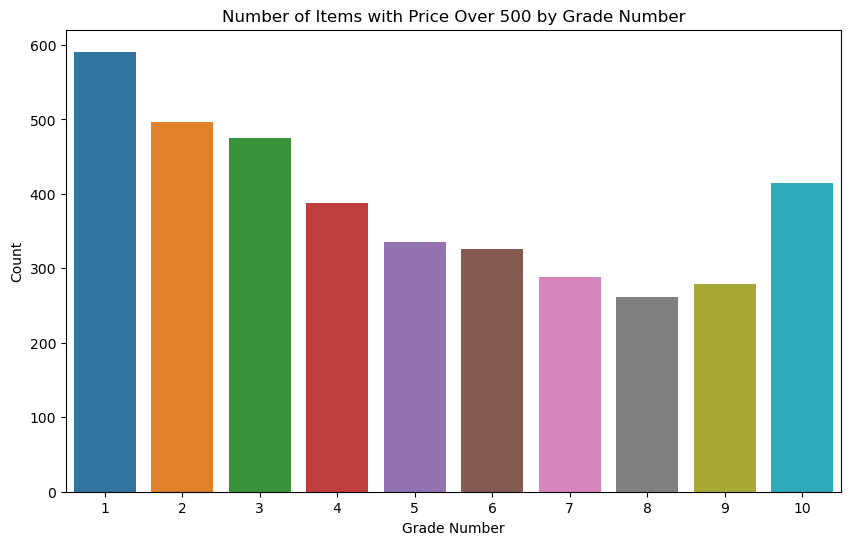

In [73]:
# Filter data where 'price_num' > 500
over_500_data = metadata_subset[metadata_subset['price_num'] > 100]

# Count the number of rows for each 'grade_num'
counts = over_500_data['grade_num'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Grade Number')
plt.ylabel('Count')
plt.title('Number of Items with Price Over 500 by Grade Number')
plt.show()


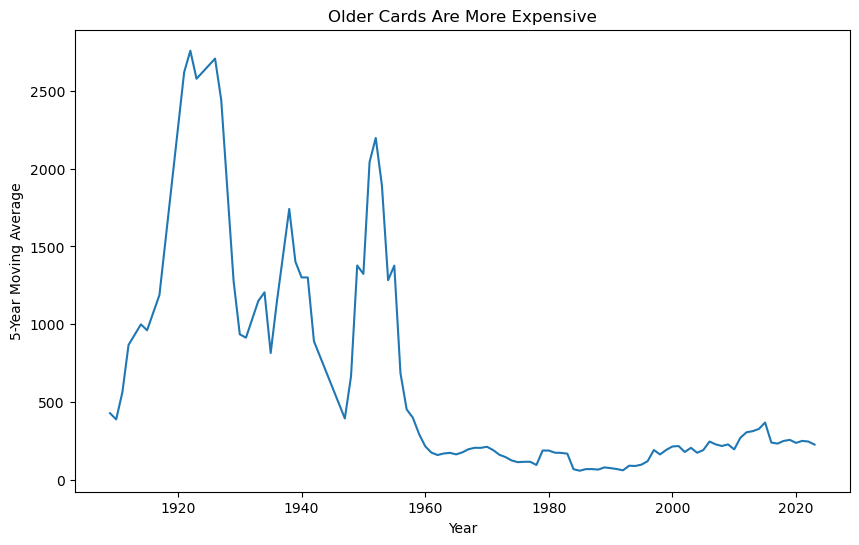

In [78]:

# First we group by year and calculate the mean price for prices < 50000
yearly_data = metadata_subset.groupby('year')['price_num'].mean().reset_index()

# Calculate 5-year moving average
yearly_data['moving_average'] = yearly_data['price_num'].rolling(window=5).mean()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='moving_average', data=yearly_data)
plt.title('Older Cards Are More Expensive')
plt.ylabel('5-Year Moving Average')
plt.xlabel('Year')
plt.show()
